In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

from tqdm import tqdm

from utils import *
from linear import LinearApprox
from taylorseries import TaylorSeries
from neural_network import *

# Function Approximation with Taylor Series, Linear Regression, and Neural Networks

**Table of Contents**

<ol>
<li>
<ol>
<li>
</ol>
</ol>

## Taylor Series

The Taylor series is an infinite sum of terms that represents a function as a series of its derivatives at a single point. It is named after the mathematician Brook Taylor. The series is particularly useful for approximating functions that are difficult to compute directly.

### Definition

Given a function $f(x)$ that is infinitely differentiable at a point $a$, the Taylor series of $f(x)$ around the point $a$ is given by:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots
$$

In general, the $n$-th term of the Taylor series is:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
$$

where:
- $f^{(n)}(a)$ is the $n$-th derivative of $f(x)$ evaluated at $a$
- $n!$ is the factorial of $n$
- $(x-a)^n$ is the $n$-th power of $(x-a)$

### Maclaurin Series

A special case of the Taylor series is the Maclaurin series, where $a = 0$. The Maclaurin series of $f(x)$ is:

$$
f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \cdots
$$

Or more generally:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n
$$

### Examples

1. **Exponential Function** $e^x$:

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

2. **Sine Function** $\sin(x)$:

$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots
$$

3. **Cosine Function** $\cos(x)$:

$$
\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots
$$

### Convergence

The Taylor series may not always converge to the function it represents. The series converges to $f(x)$ if the remainder term $R_n(x)$ approaches zero as $n$ approaches infinity. The remainder term is given by:

$$
R_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}
$$

for some $c$ between $a$ and $x$. If the remainder term goes to zero, the Taylor series converges to the function $f(x)$.


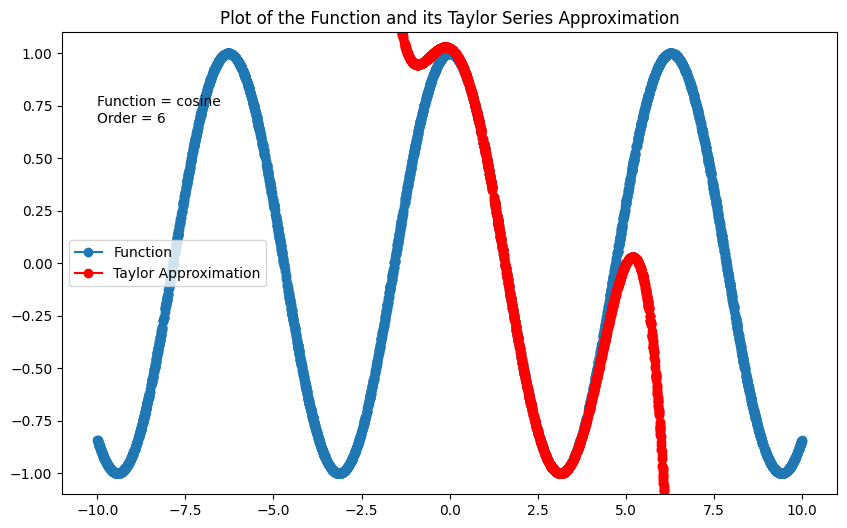

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [3]:
taylor_series = TaylorSeries()
taylor_series.visualize_plots(N = 20, A = 2, func = "cosine")

## Linear Regression

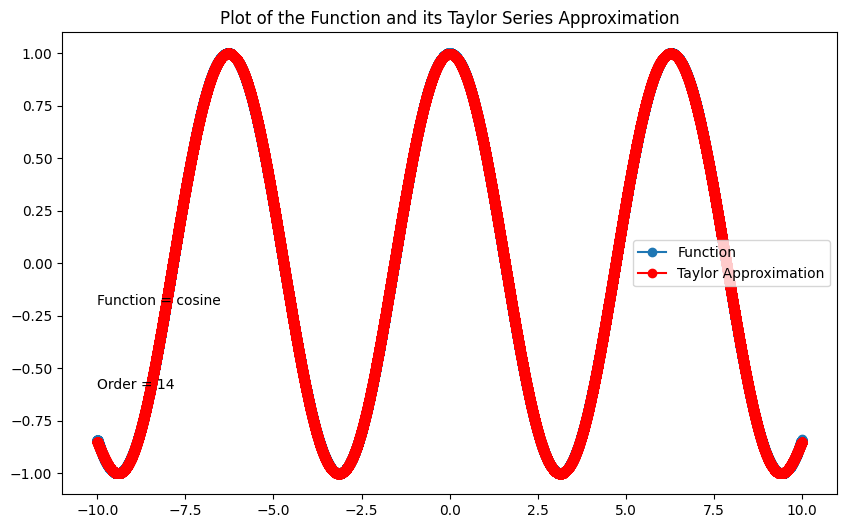

<Figure size 640x480 with 0 Axes>

In [ ]:
linear_approx = LinearApprox()
linear_approx.visualize_plots(N= 14, func = "cosine")

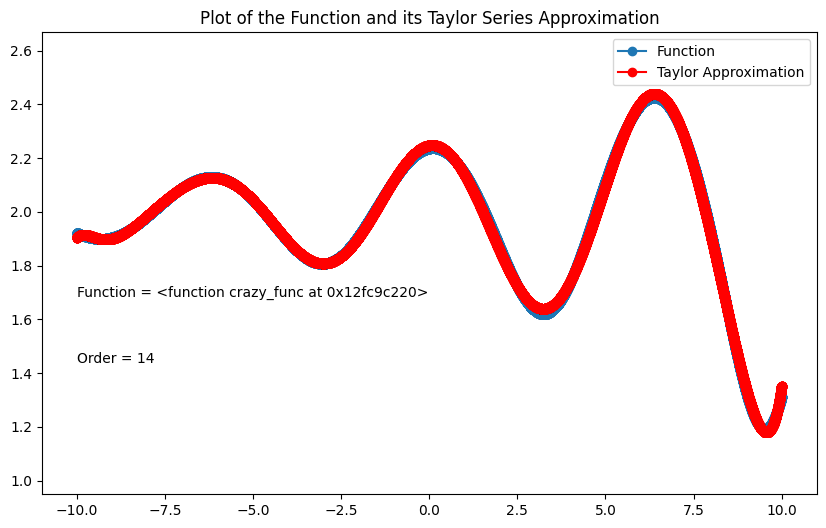

<Figure size 640x480 with 0 Axes>

In [ ]:
linear_approx.visualize_plots(N= 14, func = crazy_func)

In [ ]:
[round(i, 4) for i in linear_approx.coefs]

[-0.0,
 -0.9929,
 0.0,
 0.9804,
 -0.0,
 -0.9484,
 0.0001,
 0.8736,
 -0.0001,
 -0.7219,
 0.0,
 0.4733,
 -0.0,
 -0.1821]

## Neural Network

In [ ]:
from neural_network import *

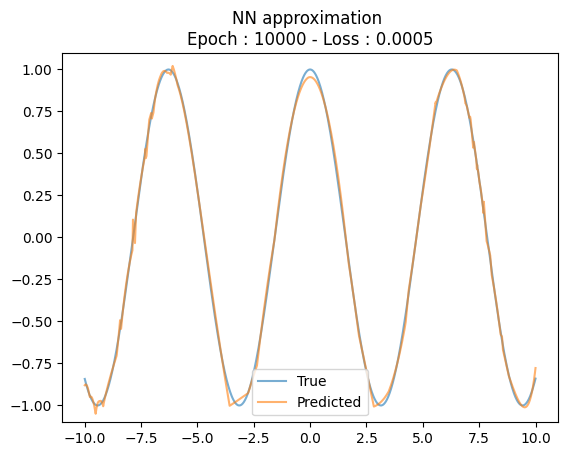

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
N = 20
fcnn_approx = FCNN_approx()
fcnn_approx.initialize(N = N, func = "cosine")
y_pred, _ = fcnn_approx.train([N,N,N,1], initial_lr=0.01, decay_rate = 0.9995, epochs = 10000, delay = 0.005)

In [ ]:
def cosine_with_noise(xs):
    return np.cos(xs) + np.random.randn(len(xs))/9

In [ ]:
N = 20
fcnn_approx = FCNN_approx()
fcnn_approx.initialize(N = N, func = cosine_with_noise)
y_pred, _ = fcnn_approx.train([N,N,N,1], initial_lr=0.01, decay_rate = 0.9995, epochs = 10000, delay = 0.0001)

KeyboardInterrupt: 

In [ ]:
cosine_with_noise(fcnn_approx.xs)

array([[-0.86904849,  0.99921183, -0.99077354, ...,  0.527797  ,
         0.76263628, -0.9983529 ],
       [-0.94349763,  0.98464285, -1.02685923, ..., -0.3884496 ,
         0.99628271, -1.0038538 ],
       [-0.85966844,  1.03945399, -1.07354524, ..., -0.58373002,
         0.96873424, -1.19305785],
       ...,
       [-0.82878706,  0.89145996, -0.68993859, ...,  1.06592178,
        -0.68624061, -0.22370586],
       [-0.93354931,  0.93092073, -0.89552099, ..., -0.77774761,
         1.00497237, -0.85481439],
       [-0.75590138,  0.94487481, -1.07847336, ...,  0.30645848,
         0.94131782, -0.97144556]])

In [ ]:
np.cos(fcnn_approx.xs)

array([[-0.83999021,  0.96039221, -0.99698089, ...,  0.20702014,
         0.96607029, -0.99235983],
       [-0.8423348 ,  0.94741769, -0.99037083, ..., -0.84278259,
         0.91661959, -0.97363984],
       [-0.85300257,  0.86456405, -0.41650625, ..., -0.21918062,
        -0.94883184,  0.25984473],
       ...,
       [-0.84552448,  0.92674775, -0.90659665, ..., -0.47315555,
         0.24329069, -0.75795588],
       [-0.84527716,  0.92847537, -0.9161012 , ..., -0.5814239 ,
         0.31130639, -0.78170718],
       [-0.84313979,  0.94253017, -0.9772841 , ..., -0.98835421,
         0.8009069 , -0.93886685]])